<div style="font-family: 'TeX Gyre Termes', serif; color: black; font-size: 18px;">

### **Histrorical Trend Analysis of Lake Temperatures using LANDSAT Data obtained through Google Earth Engine (GEE).**  
#### **Part II: Lake Temperature Data Analysis**
**Author: Ramesh Bhatta, CIS, RIT**   

This notebook uses time series temperature data collected using *Lake_temperature_trends_data_collection.ipynb* notebook in first part and generates different trends based on the data.

*Note: Make sure to go through part I and collect the data before using this code.*
</div>

<div style="font-family: 'TeX Gyre Termes', serif; color: black; font-size: 18px;">

### Location: The Fewa (Phewa) Lake 

 <figure style="text-align: center;">
    <img src="https://live.staticflickr.com/3946/15715573565_e1e65b4d17_b.jpg" alt="Fewa Lake" style="width: 700px; display: block; margin: auto;">
   <figcaption style="margin-top: 10px;">
    Figure 1: View of Fewa Lake <br>
    Source: <a href="https://en.wikipedia.org/wiki/Phewa_Lake" target="_blank">Wikipedia</a>
    </figcaption>
</figure>

The **Fewa** lake lies in **Pokhara** valley which is one of the major tourist destination in **Nepal**. It is a freshwater lake surrounded by hills and mountains and also is the second largest lake in the country. The *Annapurna mountain range* on the north is only about 28 km away from the lake and the lake is famous for the reflection of *Mt. Fishtail (seen in figure right)*, *Mt. Annapurna (seen in figure left)* and *Mt. Dhaulagiri* range on its surface. 

Even though the lake area is one of the major tourist destination, the water quality in the lake has been degraged due to significant amount of pollution caused by haphazard urbanization along the lake shores (mainly from tourism bussinesses) and direct emission of pollutants into the lake. Also during the rainy season, water hyacinth an aggressive invasive species, has invaded and polluted Fewa Lake for the last 2 decades (https://thehimalayantimes.com/opinion/fewa-laketoo-late-for-conservation). 

The purpose of this study is to use the LANDSAT based time series temperature data to see if the **Global Warming** has resulted in increase in temperature of the lake over time or decrease in the temperature due to **Local Pollution** or any other reasons. 

</div>

In [1]:
## Importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Predefined plot preferences

# Define text sizes
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

# Apply text size settings
plt.rc('font', size=SMALL_SIZE)          # Default font size
plt.rc('axes', titlesize=MEDIUM_SIZE)   # Axis title font size
plt.rc('axes', labelsize=MEDIUM_SIZE)   # Axis labels font size
plt.rc('xtick', labelsize=SMALL_SIZE)   # X-axis tick label font size
plt.rc('ytick', labelsize=SMALL_SIZE)   # Y-axis tick label font size
plt.rc('legend', fontsize=SMALL_SIZE)   # Legend font size
plt.rc('figure', titlesize=BIGGER_SIZE) # Figure title font size

In [3]:
## Import the lake temperature time series csv file

df = pd.read_csv('./lake_temperature_time_series.csv')

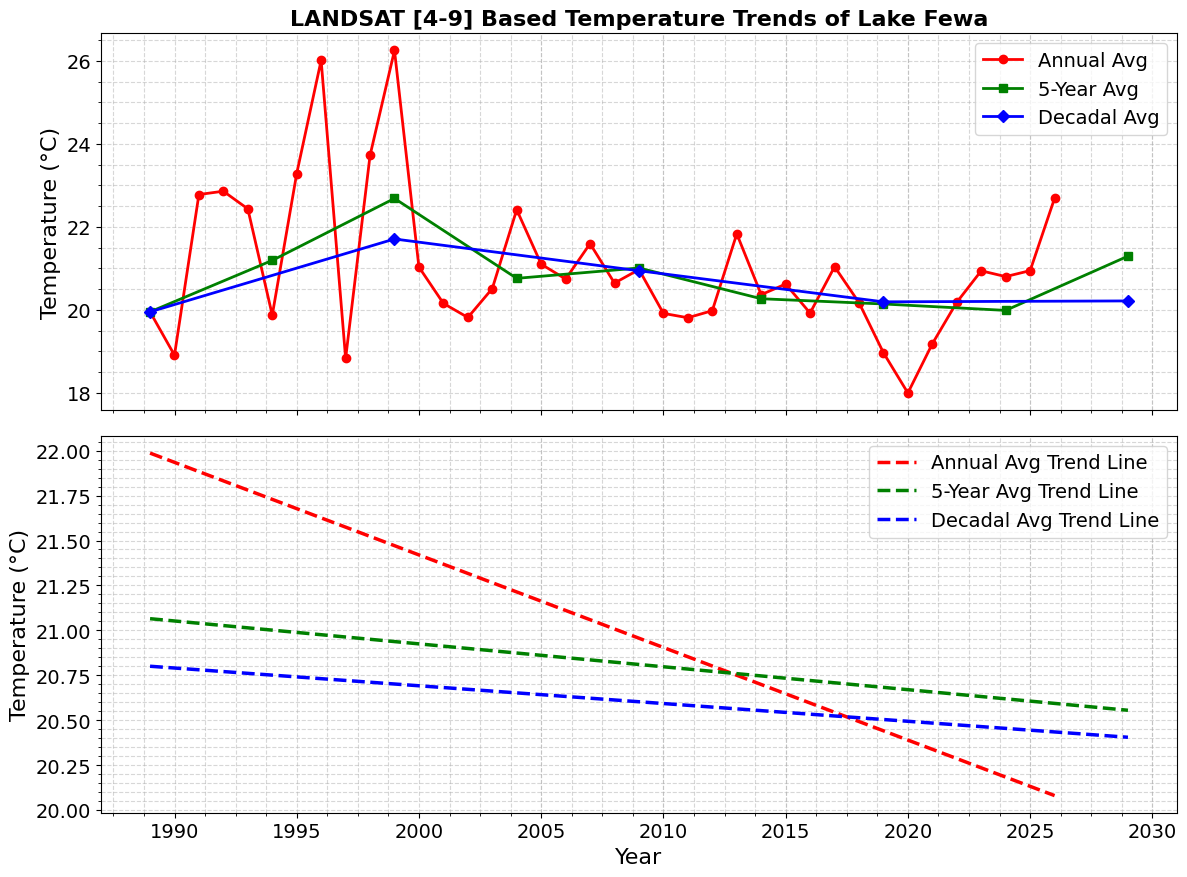

In [4]:
## Convert 'Date' to datetime format for analysis

df["Date"] = pd.to_datetime(df["Date"])  

## Convert temperature from Kelvin (K) to Celsius (C)
df["Temperature (C)"] = df["Temperature (K)"] - 273.15

# Set Date as index for resampling
df.set_index("Date", inplace=True)

# Compute time-based averages
annual_avg = df["Temperature (C)"].resample("YE").mean()        # yearly average
five_year_avg = df["Temperature (C)"].resample("5YE").mean()    # 5 yearly average
decadal_avg = df["Temperature (C)"].resample("10YE").mean()     # decadal average

# Function to fit and plot a trendline
def plot_trendline(x, y, color, label):
    x_num = np.array([d.year for d in x])  # Convert datetime index to numerical years
    coeffs = np.polyfit(x_num, y, 1)  # Fit a linear trend
    trendline = np.poly1d(coeffs)(x_num)  # Generate trendline values
    plt.plot(x, trendline, linestyle="--", color=color, linewidth=2.5, label=f"{label} Trend Line")

# Plot
fig, axs = plt.subplots(2, 1, figsize=(12, 9), sharex=True)

# Plot average values
axs[0].plot(annual_avg.index, annual_avg, label="Annual Avg", linewidth=2, color="red", marker="o")
axs[0].plot(five_year_avg.index, five_year_avg, label="5-Year Avg", linewidth=2, color="green", marker="s")
axs[0].plot(decadal_avg.index, decadal_avg, label="Decadal Avg", linewidth=2, color="blue", marker="D")
axs[0].set_ylabel("Temperature (°C)")
axs[0].set_title("LANDSAT [4-9] Based Temperature Trends of Lake Fewa", fontweight="bold")
axs[0].legend()
axs[0].grid(which='both', linestyle="--", alpha=0.5)
axs[0].minorticks_on()
axs[0].tick_params(axis='x', rotation=45)

# Plot trendlines
plot_trendline(annual_avg.index, annual_avg.values, color="red", label="Annual Avg")
plot_trendline(five_year_avg.index, five_year_avg.values, color="green", label="5-Year Avg")
plot_trendline(decadal_avg.index, decadal_avg.values, color="blue", label="Decadal Avg")
axs[1].set_xlabel("Year")
axs[1].set_ylabel("Temperature (°C)")
axs[1].legend()
axs[1].grid(which='both', linestyle="--", alpha=0.5)
axs[1].minorticks_on()
plt.tight_layout()
plt.show()

<div style="font-family: 'TeX Gyre Termes', serif; color: black; font-size: 18px;">

#### **COMMENTS**
The plot presented above shows the average temperature plot *(Top)* over time since 1989 till 2025 and the trendline *(Bottom)* based on those average temperature. It is interesting to see that the trendline shows decreasing lake temperature overtime. This mean that the effect of *local environmental variations* is driving towards decreasing the net lake temperature rather than increasing due to *global warming*. Such decrease in temperature over time could be attributed to certain factors:

- First, the lake is at relatively higher altitude *(742 m)* above sea level and closer to the himalayan ranges which might have influenced in maintaining the temperature to a certain level and prevent it from increasing.
- Second, the average temperature might not be actually changing but due to the calibration issues with previous LANDSATs it is showing higher values for those earlier LANDSATs. 
- Third, and most likely reason is due to- (i) increasing level of pollution over time due to large scale poorly managed urbanization resulting in increased areosols content in atmosphere (causes *global dimming*) as well as mixing of solid pollutant into the lake from industries and local bussinesses, (ii) dense algal bloom on surface waters can shade the deeper water (*eutrophication*) increasing shading effect,  (iii) high sediment influx during monsoons reduce water transparency, limiting sunlight penetration and hence decrease temperature. Overall these lake specific effects have resulted in overriding the broader warming trend.

In conclusion, the decreasing temperature trend in lake *Fewa* in contrast to *golbal warming* should be a key motivation for additional research into the underlying reasons, such as the functions of pollution, sedimentation, and shifting hydrological dynamics, in order to better understand and remedy the factiors impacting the thermal attibutes of the lake.

</div>